In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Importing all datasets
import os
print(os.getcwd())
churn_data = pd.read_csv("data/telecom_churn_data.csv")
churn_data.head()

/Users/manoj/work/iiit-upgrad/Machine-Learning-Case-Study/Telcome_Churn


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [72]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [73]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### Too many rows to Analyze.
##### Check Missing data and remove who have too many missing values in column

In [74]:
#missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]
#missing_column_data=churn_data[missing_column]
missing_column_data.isnull().sum()

date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_7             74428
count_rech_2g_8             73660
count_rech_2g_9             74077
count_rech_3g_6             74846
count_rech_3g_7             74428
count_rech_3g_8             73660
count_rech_3g_9             74077
av_rech_amt_data_6          74846
av_rech_amt_data_7          74428
av_rech_amt_data_8          73660
av_rech_amt_data_9          74077
arpu_3g_6                   74846
arpu_3g_7                   74428
arpu_3g_8                   73660
arpu_3g_9                   74077
arpu_2g_6                   74846
arpu_2g_7     

#### As too many column data are missing more than 50%, lets check if column value if missing more than 5%

In [96]:
#missing_column = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 5]
#missing_column
#print((100*churn_data.isnull().sum()/len(churn_data.index)))
print(churn_data.filter(regex='rech').columns)
print("Missing Columns Name of more than 50% value missing=====")
print(churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50])
missing_columns = churn_data.columns[(100*churn_data.isnull().sum()/len(churn_data.index)) > 50]

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')
Missing Columns Name of more than 50% value

#### Lots of column having more than 50% data is mssing.

In [97]:
### Removing column if all rows value is missings
cleaned_churn_df = churn_data.drop(labels=missing_columns,axis=1)
cleaned_churn_df.shape

(99999, 186)

In [99]:
# Remove rows if any row value is missing
cleaned_churn_df = cleaned_churn_df.dropna(axis=0,how='any')
cleaned_churn_df.shape

(84185, 186)

#### Removed rows which having any missing values

In [100]:
cleaned_churn_df.select_dtypes(exclude=['int', 'float']).columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [102]:
date_attributes = ['last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9']
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014
3,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/28/2014,7/31/2014,8/31/2014,9/30/2014
4,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/26/2014,7/28/2014,8/9/2014,9/28/2014
5,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/19/2014,7/17/2014,8/24/2014,9/28/2014


In [103]:
cleaned_churn_df[date_attributes] = cleaned_churn_df[date_attributes].applymap(lambda x : pd.to_datetime(x, infer_datetime_format=True))

In [104]:
cleaned_churn_df[date_attributes].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
1,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-29,2014-07-31,2014-08-28,2014-09-30
2,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-17,2014-07-24,2014-08-14,2014-09-29
3,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-28,2014-07-31,2014-08-31,2014-09-30
4,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-26,2014-07-28,2014-08-09,2014-09-28
5,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-06-19,2014-07-17,2014-08-24,2014-09-28


In [105]:
cleaned_churn_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,8.418500e+04,84185.0,84185.0,84185.0,84185.0,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,...,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000,84185.000000
mean,7.001227e+09,109.0,0.0,0.0,0.0,294.902871,298.714947,304.333608,290.683456,133.736664,...,0.092831,0.076914,0.084302,0.092534,0.094126,1273.130083,74.943136,71.805762,63.273043,3.737929
std,6.879239e+05,0.0,0.0,0.0,0.0,328.760913,342.675529,352.369638,350.229101,297.864522,...,0.400950,0.578251,0.638150,0.700907,0.688381,965.107844,278.726313,281.320228,260.105991,34.528453
min,7.000000e+09,109.0,0.0,0.0,0.0,-810.661000,-622.509000,-345.129000,-1474.195000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000641e+09,109.0,0.0,0.0,0.0,101.690000,103.141000,106.726000,93.483000,7.990000,...,0.000000,0.000000,0.000000,0.000000,0.000000,485.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001235e+09,109.0,0.0,0.0,0.0,209.143000,211.112000,215.082000,204.795000,35.430000,...,0.000000,0.000000,0.000000,0.000000,0.000000,936.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001822e+09,109.0,0.0,0.0,0.0,385.127000,388.069000,396.269000,384.121000,120.580000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,11.000000,29.000000,33.000000,41.000000,49.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [106]:
#churn_data.columns

## Data Preparation

In [107]:
## Number of days between two recharcge:
cleaned_churn_df['first_recharge_gap'] = cleaned_churn_df['date_of_last_rech_7'] - cleaned_churn_df['date_of_last_rech_6']
cleaned_churn_df['second_recharge_gap'] = cleaned_churn_df['date_of_last_rech_8'] - cleaned_churn_df['date_of_last_rech_7']
cleaned_churn_df['third_recharge_gap'] = cleaned_churn_df['date_of_last_rech_9'] - cleaned_churn_df['date_of_last_rech_8']

##### Remove date columns from data sets as of no use.

In [109]:
derived_df = cleaned_churn_df.drop(labels=date_attributes,axis=1)
derived_df['first_recharge_gap']= derived_df['first_recharge_gap']/np.timedelta64(1,'D')
derived_df['second_recharge_gap']= derived_df['second_recharge_gap']/np.timedelta64(1,'D')
derived_df['third_recharge_gap']= derived_df['third_recharge_gap']/np.timedelta64(1,'D')


derived_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap
1,7001865778,109,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,...,0,0,1006,0.0,0.0,0.00,0.0,32.0,28.0,33.0
2,7001625959,109,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,...,0,0,1103,0.0,0.0,4.17,0.0,37.0,21.0,46.0
3,7001204172,109,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,...,0,0,2491,0.0,0.0,0.00,0.0,33.0,31.0,30.0
4,7000142493,109,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,...,0,0,1526,0.0,0.0,0.00,0.0,32.0,12.0,50.0
5,7000286308,109,0.0,0.0,0.0,50.258,58.810,83.386,170.826,50.16,...,0,0,1471,0.0,0.0,0.00,0.0,28.0,38.0,35.0


In [110]:
#cleaned_df['avg_recharge_goodPhase'] = 
recharge_attributes_df = derived_df.filter(regex='rech')
recharge_attributes_df.head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,first_recharge_gap,second_recharge_gap,third_recharge_gap
1,4,9,11,5,74,384,283,121,44,154,65,50,32.0,28.0,33.0
2,5,4,2,7,168,315,116,358,86,200,86,100,37.0,21.0,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,33.0,31.0,30.0
4,5,6,3,4,196,350,287,200,56,110,110,50,32.0,12.0,50.0
5,2,2,3,3,120,0,130,130,120,0,130,130,28.0,38.0,35.0


In [114]:
recharge_attributes_df.columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'first_recharge_gap', 'second_recharge_gap', 'third_recharge_gap'],
      dtype='object')

#### Considering Total recharge amount  total_rech_amt_* to derived high end customer


In [115]:
#derived_df.filter(regex='rech').columns

In [121]:
## Average of Good Phase will be avg of 6th and 7th Month amount
derived_df['av_amt_rech_good_phase'] = (derived_df['total_rech_amt_6'] + derived_df['total_rech_amt_7'])/2
derived_df['av_amt_rech_good_phase'].describe()

count    84185.000000
mean       344.834359
std        380.069550
min          0.000000
25%        126.500000
50%        248.000000
75%        444.000000
max      37762.500000
Name: av_amt_rech_good_phase, dtype: float64

In [122]:
# Calculating 70% percentile vale
X= derived_df.av_amt_rech_good_phase.quantile(0.7)

In [123]:
high_usage_customer = derived_df.loc[derived_df['av_amt_rech_good_phase'] >= X]
high_usage_customer.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,0,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,...,0,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,...,0,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0,720,0.00,0.00,0.00,0.0,31.0,31.0,30.0,640.0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,799.356,0.00,...,0,1328,358.10,2706.83,1714.67,0.0,30.0,27.0,33.0,1932.0


In [124]:
high_usage_customer.shape

(25335, 182)

#### Now need to derive all 9th month data and customer usage data to tag Churn or not Churn

In [159]:
churn_phase_attributes = high_usage_customer.filter(regex='_9').columns
churn_phase_attributes

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [160]:
#total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
churn_decision_making_attributes= ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
high_usage_customer['churn']=high_usage_customer[churn_phase_decision_making_attributes].sum(axis=1)
high_usage_customer['churn'] = high_usage_customer['churn'] > 0
high_usage_customer['churn'] = high_usage_customer['churn'].map({True:0,False:1})


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

#### Droping Churn phase atributes

In [161]:
action_phase_df = high_usage_customer.drop(labels=churn_phase_attributes,axis=1)
action_phase_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,first_recharge_gap,second_recharge_gap,third_recharge_gap,av_amt_rech_good_phase,churn
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,...,315,21.03,910.65,122.16,0.0,36.0,30.0,31.0,519.0,0
16,7000875565,109,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,...,511,0.00,2.45,21.89,0.0,31.0,14.0,27.0,459.0,0
17,7000187447,109,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,...,667,0.00,0.00,0.00,0.0,30.0,26.0,35.0,408.0,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,...,720,0.00,0.00,0.00,0.0,31.0,31.0,30.0,640.0,0
33,7000149764,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,...,1328,358.10,2706.83,1714.67,0.0,30.0,27.0,33.0,1932.0,0


## Model Building

In [163]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = action_phase_df.drop(['churn','mobile_number','circle_id'],axis=1)

# Putting response variable to y
y = action_phase_df['churn']

y.head()

8     0
16    0
17    0
21    0
33    0
Name: churn, dtype: int64

In [165]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


#### PCA Implementation

In [167]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
#Doing the PCA on the train data
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

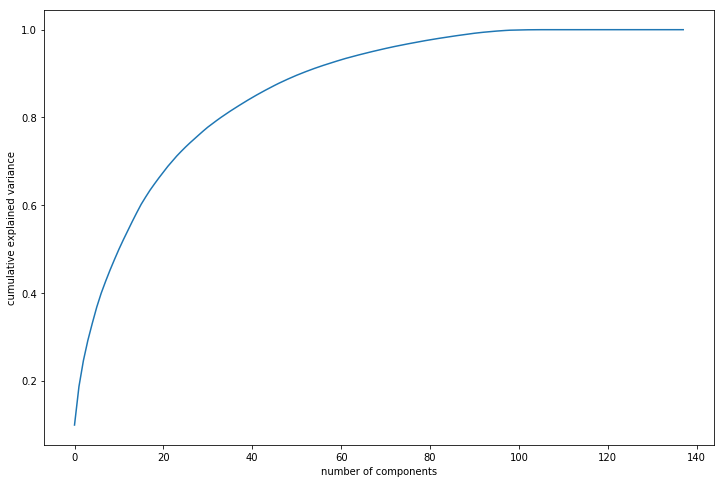

In [168]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [170]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)

df_train_pca = pca_final.fit_transform(X_train_scaled)
df_train_pca.shape

(17734, 60)

In [171]:
#Applying selected components to the test data - 16 components
df_test_pca = pca_final.transform(X_test_scaled)
df_test_pca.shape

(7601, 60)

#### Applying a logistic regression on our Principal Components


In [172]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [186]:
#Making prediction on the test data
from sklearn import metrics
pred_probs_test = model_pca.predict(df_test_pca)
accuracy = metrics.accuracy_score(y_test, pred_probs_test)
print("Accuracy {}".format(accuracy))


Accuracy 0.9657939744770425


In [176]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_probs_test)
print(cm)

[[7319   20]
 [ 240   22]]


Confusion matrix, without normalization
[[7319   20]
 [ 240   22]]


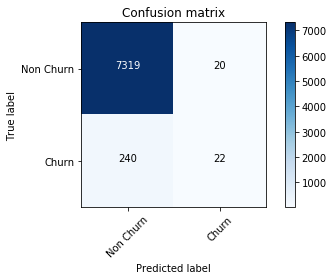

In [182]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
plot_confusion_matrix(cm, classes=['Non Churn', 'Churn'], title='Confusion matrix')